In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
df = pd.read_excel("C://Users/ad/Downloads/Assignment-1_Data.xlsx")



In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BillNo      522064 non-null  object        
 1   Itemname    520609 non-null  object        
 2   Quantity    522064 non-null  int64         
 3   Date        522064 non-null  datetime64[ns]
 4   Price       522064 non-null  float64       
 5   CustomerID  388023 non-null  float64       
 6   Country     522064 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 27.9+ MB


In [51]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)

    print("##################### Types #####################")
    print(dataframe.dtypes)

    print("##################### Head #####################")
    print(dataframe.head(head))

    print("##################### Tail #####################")
    print(dataframe.tail(head))

    print("##################### NA #####################")
    print(dataframe.isnull().sum())

In [52]:
# Drop na values
df.dropna(inplace=True)
# Quantity and Price should be  greater than 0
df = df[df["Quantity"] > 0]
# We have to change the price column datatype as a numeric
df ['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df = df[df["Price"] > 0]

In [9]:
check_df(df)

##################### Shape #####################
(387985, 7)
##################### Types #####################
BillNo                object
Itemname              object
Quantity               int64
Date          datetime64[ns]
Price                float64
CustomerID           float64
Country               object
dtype: object
##################### Head #####################
   BillNo                             Itemname  Quantity                Date  \
0  536365   WHITE HANGING HEART T-LIGHT HOLDER         6 2010-12-01 08:26:00   
1  536365                  WHITE METAL LANTERN         6 2010-12-01 08:26:00   
2  536365       CREAM CUPID HEARTS COAT HANGER         8 2010-12-01 08:26:00   
3  536365  KNITTED UNION FLAG HOT WATER BOTTLE         6 2010-12-01 08:26:00   
4  536365       RED WOOLLY HOTTIE WHITE HEART.         6 2010-12-01 08:26:00   

   Price  CustomerID         Country  
0   2.55     17850.0  United Kingdom  
1   3.39     17850.0  United Kingdom  
2   2.75     17850.0  Un

In [10]:
total_sales = df
total_sales["Total_Price"] = total_sales["Price"] * total_sales["Quantity"]
#total_sales.columns
total_sales_per_customer = total_sales.groupby(["CustomerID", "Country"]).agg({"Total_Price": "sum"})
total_sales_per_customer.head(10)

,,Total_Price
CustomerID,Country,
12346.0,United Kingdom,77183.60
12347.0,Iceland,4310.00
12349.0,Italy,1757.55
12350.0,Norway,334.40
12352.0,Norway,2506.04
12353.0,Bahrain,89.00
12354.0,Spain,1079.40
12355.0,Bahrain,459.40
12356.0,Portugal,2811.43


In [17]:
import pandas as pd


# Tính doanh thu cho mỗi sản phẩm
df['TotalRevenue'] = df['Quantity'] * df['Price']

# Tính tổng doanh thu cho mỗi sản phẩm
total_revenue_per_product = df.groupby('Itemname')['TotalRevenue'].sum()

# Sắp xếp theo doanh thu giảm dần và chọn top 10
top_10_products = total_revenue_per_product.nlargest(10)

# Hiển thị kết quả
print(top_10_products)


Itemname
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              134253.10
WHITE HANGING HEART T-LIGHT HOLDER     96931.55
JUMBO BAG RED RETROSPOT                84316.26
MEDIUM CERAMIC TOP STORAGE JAR         80846.97
POSTAGE                                72663.02
PARTY BUNTING                          66771.83
ASSORTED COLOUR BIRD ORNAMENT          56080.10
RABBIT NIGHT LIGHT                     50858.28
Manual                                 49240.70
Name: TotalRevenue, dtype: float64


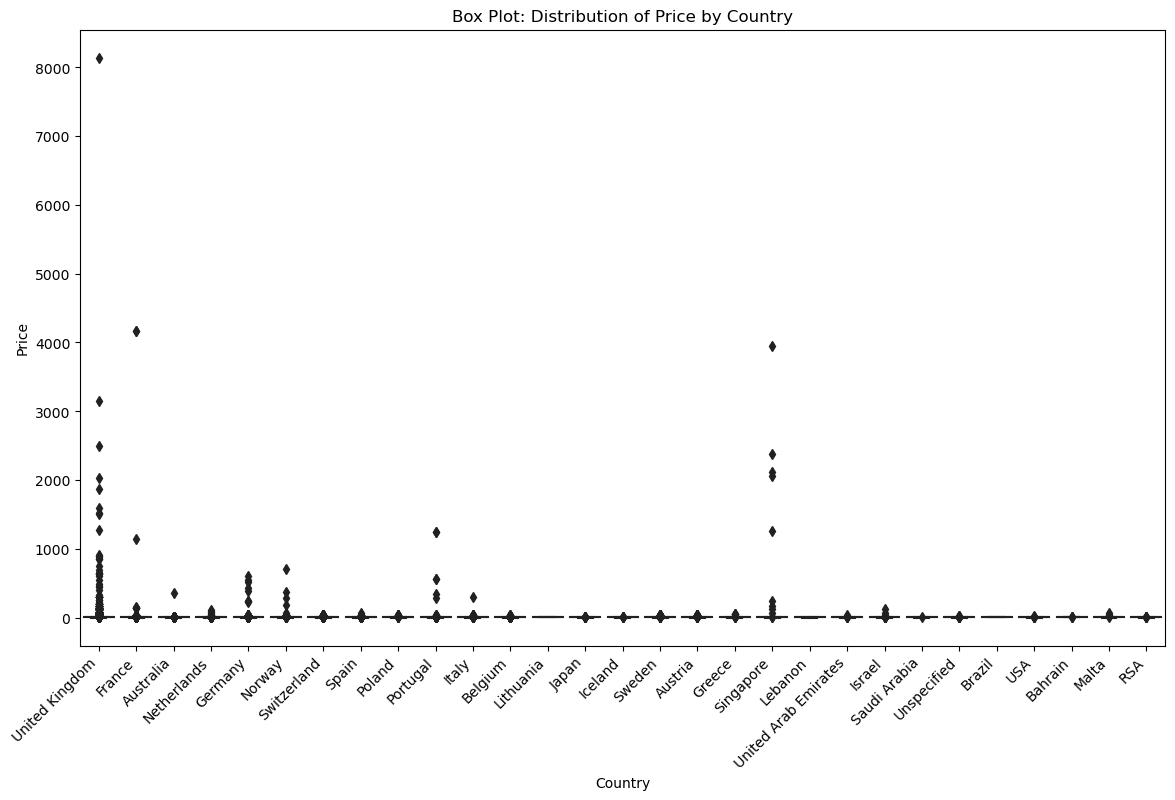

In [21]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Country', y='Price', data=df, palette='viridis')
plt.title('Box Plot: Distribution of Price by Country')
plt.xlabel('Country')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\ad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


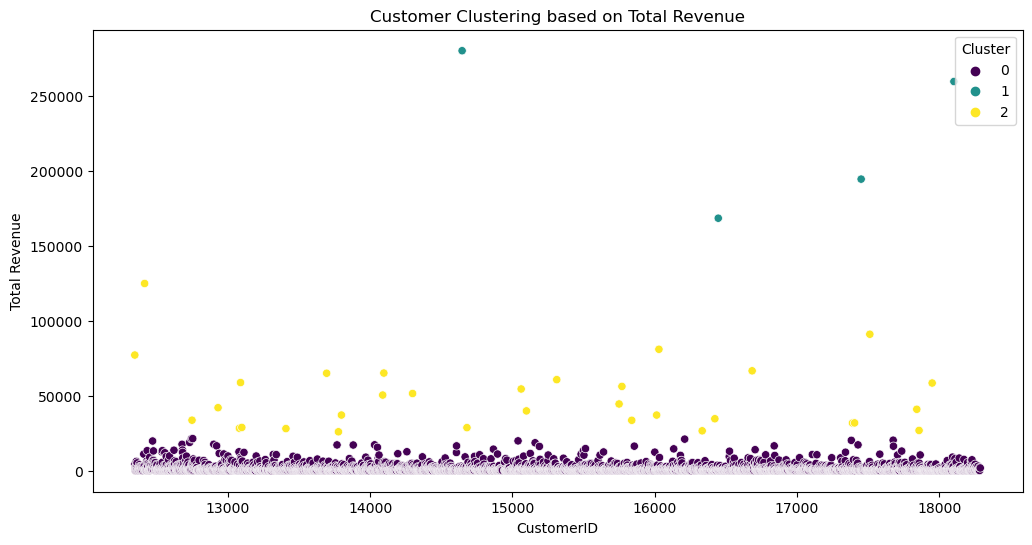

In [23]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Tính doanh thu cho mỗi sản phẩm
df['TotalRevenue'] = df['Quantity'] * df['Price']

# Tạo DataFrame mới với thông tin cần thiết
customer_data = df.groupby('CustomerID')['TotalRevenue'].sum().reset_index()

# Phân loại khách hàng thành 3 nhóm sử dụng KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(customer_data[['TotalRevenue']])

# Vẽ biểu đồ phân loại khách hàng
plt.figure(figsize=(12, 6))
sns.scatterplot(x='CustomerID', y='TotalRevenue', hue='Cluster', data=customer_data, palette='viridis')
plt.title('Customer Clustering based on Total Revenue')
plt.xlabel('CustomerID')
plt.ylabel('Total Revenue')
plt.show()


C:\Users\ad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


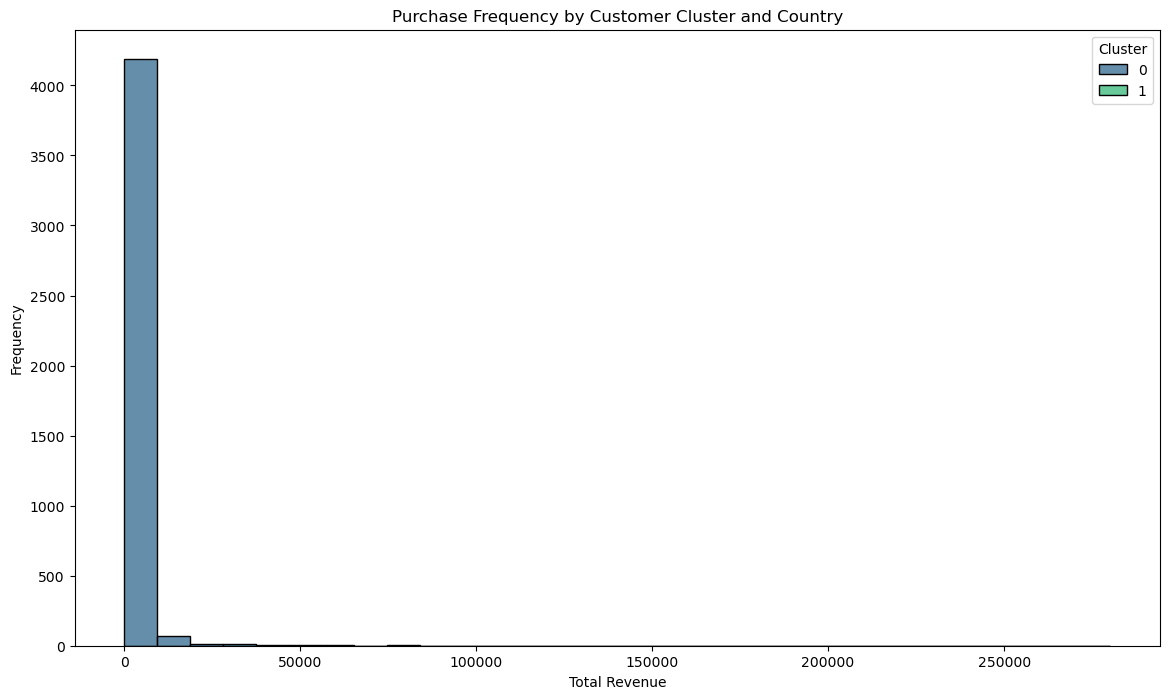

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# Tính doanh thu cho mỗi sản phẩm
df['TotalRevenue'] = df['Quantity'] * df['Price']

# Tạo DataFrame mới với thông tin cần thiết
customer_data = df.groupby(['CustomerID', 'Country'])['TotalRevenue'].sum().reset_index()

# Phân loại khách hàng thành 3 nhóm sử dụng KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(customer_data[['TotalRevenue']])

# Tạo biểu đồ tần suất mua sắm theo nhóm khách hàng và quốc gia
plt.figure(figsize=(14, 8))
sns.histplot(x='TotalRevenue', hue='Cluster', multiple='stack', data=customer_data, bins=30, palette='viridis')
plt.title('Purchase Frequency by Customer Cluster and Country')
plt.xlabel('Total Revenue')
plt.ylabel('Frequency')
plt.show()


In [31]:
total_sales_per_customer.groupby(["Country"]).agg({"Total_Price":"sum"}).reset_index().sort_values(by="Total_Price", ascending=False )


,Country,Total_Price
27,United Kingdom,7308391.554
15,Netherlands,285446.340
6,Germany,228867.140
5,France,209024.050
0,Australia,138521.310
22,Spain,61577.110
24,Switzerland,56443.950
3,Belgium,41196.340
23,Sweden,38378.330
11,Japan,37416.370


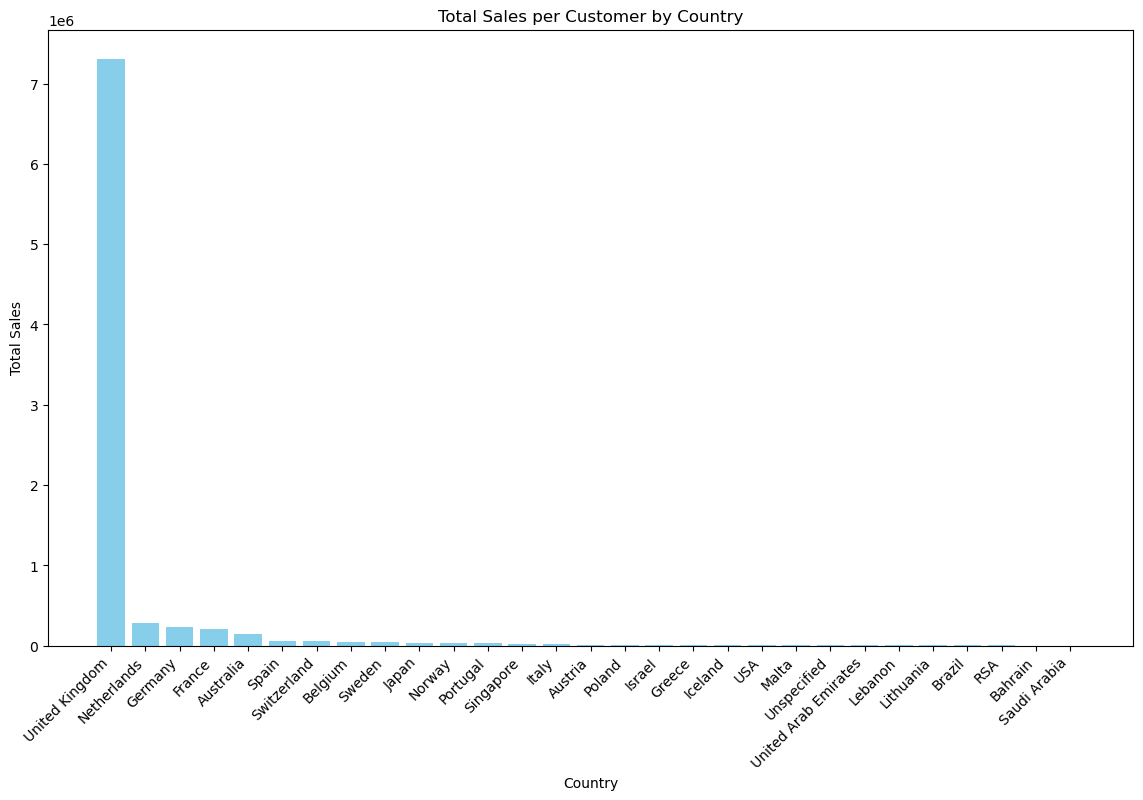

In [38]:
import matplotlib.pyplot as plt

# Giả sử b đã lưu data trong biến total_sales_per_customer
total_sales_per_customer_by_country = total_sales_per_customer.groupby(["Country"]).agg({"Total_Price":"sum"}).reset_index().sort_values(by="Total_Price", ascending=False)

# Plotting the bar plot
plt.figure(figsize=(14, 8))
plt.bar(total_sales_per_customer_by_country["Country"], total_sales_per_customer_by_country["Total_Price"], color='skyblue')
plt.title('Total Sales per Customer by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.show()


In [40]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth


# Chuẩn bị dữ liệu thành danh sách giao dịch
transactions = df.groupby('BillNo')['Itemname'].apply(list).values.tolist()

# Sử dụng TransactionEncoder để chuyển đổi danh sách giao dịch thành dạng dữ liệu phù hợp cho FP-growth
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Áp dụng FP-Growth để tìm các mẫu phổ biến
frequent_itemsets = fpgrowth(df_encoded, min_support=0.05, use_colnames=True)

# In các mẫu phổ biến
print(frequent_itemsets)

     support                              itemsets
0   0.105678  (WHITE HANGING HEART T-LIGHT HOLDER)
1   0.074784       (ASSORTED COLOUR BIRD ORNAMENT)
2   0.057437                             (POSTAGE)
3   0.053032      (PAPER CHAIN KIT 50'S CHRISTMAS)
4   0.069717             (LUNCH BAG RED RETROSPOT)
5   0.054629     (PACK OF 72 RETROSPOT CAKE CASES)
6   0.052371      (NATURAL SLATE HEART CHALKBOARD)
7   0.051930               (HEART OF WICKER SMALL)
8   0.086624             (JUMBO BAG RED RETROSPOT)
9   0.053858           (LUNCH BAG SPACEBOY DESIGN)
10  0.050333             (LUNCH BAG PINK POLKADOT)
11  0.057217             (LUNCH BAG  BLACK SKULL.)
12  0.052206                 (LUNCH BAG CARS BLUE)
13  0.089597            (REGENCY CAKESTAND 3 TIER)
14  0.074398                       (PARTY BUNTING)
15  0.061237    (SET OF 3 CAKE TINS PANTRY DESIGN)
16  0.053968                      (SPOTTY BUNTING)
